# Combining Data Using Pandas

In [58]:
import pandas as pd
import numpy as np

#### Read All file CSV for differnet years And add Column to each data set represent it's year

In [5]:
happiness2015 = pd.read_csv("happiness2015.csv")
happiness2016=pd.read_csv("hapiness2016.csv")
happiness2017=pd.read_csv("hapiness2017.csv")
happiness2015["Year"]=2015
happiness2016["Year"]=2016
happiness2017["Year"]=2017

## 1-  Combine using pd.Concat([df1,df2]) function 
 ##### there are two ways to combine which is take dataframes As a list  "Gluging function"
 1- Stacked |Axis=0 "default"
 
 2-Side By Side |Axis=1

In [19]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [18]:
concat_axis0=pd.concat([head_2015,head_2016] ,axis=0)
concat_axis1=pd.concat([head_2015,head_2016] ,axis=1)

In [20]:
## To find The number of Row for each combining use len() function
question1=len(concat_axis0) ## expected 6
question2=len(concat_axis1)## expected 3

### Concat  Two DataSets with different number of Columns 

In [32]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0=pd.concat([head_2015,head_2016])

In [33]:
# indexes are duplicated so they could cause errors as we perform other data cleaning tasks.
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [34]:
# ignore indexes
concat_update_index=pd.concat([head_2015,head_2016],ignore_index=True)

## 2- Combine Using Merge() Function
 Combine only Horizontal (axis=1) | combine only two data frames 
 
  Note:combine dataframes on a key, a shared index or column So use keys with unique values to avoid duplicating data. On attribute

In [38]:
three_2015=happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]

In [39]:
three_2016=happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

#### Differnet Type of Joins Can perfrom with Merge() Function

In [50]:
# merged will maked a join for matched Rows only 
merged=pd.merge(left=three_2015,right=three_2016,on='Country')

In [51]:
#includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key
merged_left_updated = pd.merge(left=three_2015, right=three_2016, on='Country' ,how='left')

In [52]:
 #includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key
merged_right_updated = pd.merge(left=three_2015, right=three_2016, on='Country' ,how='right')

#### Change Suffixes of Column  which auto Created by merge ()function 

In [53]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country',suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country',suffixes=('_2016', '_2015'))

### Join Using indexes parameter in Merge () function

left_index=True , right_index=True

In [55]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, 
                       suffixes = ('_2015','_2016'))

# Question:
### Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

In [59]:
#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

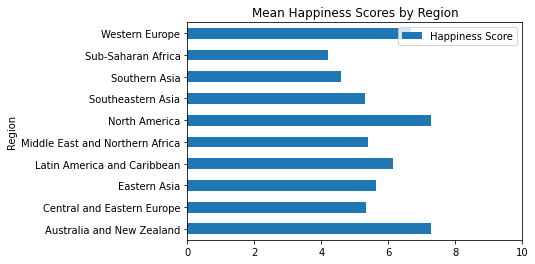

In [60]:
#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

In [ ]:
# Rename Column name of dataset 2017 to match aother Column name
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [66]:
combined=pd.concat([happiness2015,happiness2016,happiness2017])

<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

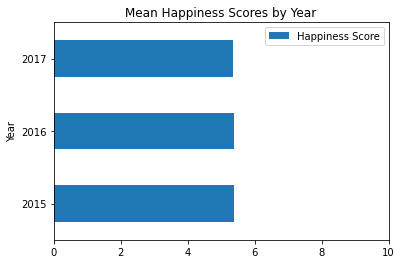

In [68]:
# Group mean happing score  values by year 
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

##  Answer :the mean world happiness score stayed approximately the same from 2015 to 2017